In [1]:
import twitter

# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = 'KBx5ff3Km0q8s7ESa7G6ZWWcE'
CONSUMER_SECRET = 'QPb59eocVqHorI6pVttmr6kzx6bgeBh1Hso1r3avZIrZJjiU6y'
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print twitter_api

In [2]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

print world_trends
print
print us_trends

[{u'created_at': u'2016-04-06T01:40:55Z', u'trends': [{u'url': u'http://twitter.com/search?q=%23VaiMunik', u'query': u'%23VaiMunik', u'tweet_volume': 186159, u'name': u'#VaiMunik', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23BlackGirlsRock', u'query': u'%23BlackGirlsRock', u'tweet_volume': 87008, u'name': u'#BlackGirlsRock', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23ShadowhuntersChat', u'query': u'%23ShadowhuntersChat', u'tweet_volume': 48667, u'name': u'#ShadowhuntersChat', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23MartesIntratable', u'query': u'%23MartesIntratable', u'tweet_volume': 17023, u'name': u'#MartesIntratable', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=%23CallejerosInocentes', u'query': u'%23CallejerosInocentes', u'tweet_volume': 22267, u'name': u'#CallejerosInocentes', u'promoted_content': None}, {u'url': u'http://twitter.com/search?q=Wisconsin', u'query': u'Wisconsin'

In [3]:
import json

print json.dumps(world_trends, indent=1)
print
print json.dumps(us_trends, indent=1)

[
 {
  "created_at": "2016-04-06T01:40:55Z", 
  "trends": [
   {
    "url": "http://twitter.com/search?q=%23VaiMunik", 
    "query": "%23VaiMunik", 
    "tweet_volume": 186159, 
    "name": "#VaiMunik", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23BlackGirlsRock", 
    "query": "%23BlackGirlsRock", 
    "tweet_volume": 87008, 
    "name": "#BlackGirlsRock", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23ShadowhuntersChat", 
    "query": "%23ShadowhuntersChat", 
    "tweet_volume": 48667, 
    "name": "#ShadowhuntersChat", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23MartesIntratable", 
    "query": "%23MartesIntratable", 
    "tweet_volume": 17023, 
    "name": "#MartesIntratable", 
    "promoted_content": null
   }, 
   {
    "url": "http://twitter.com/search?q=%23CallejerosInocentes", 
    "query": "%23CallejerosInocentes", 
    "tweet_volume": 22267, 
    "name": "#C

In [4]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print common_trends

set([u'#ShadowhuntersChat', u'#IdolFarewell', u'#GoogleMustThinkIm', u'#DescribeAVideoGameBadly', u'#IfLovingYouIsWrong', u'#BlackGirlsRock', u'#BGC15', u'#TotalDivas', u'#lovesick10days', u'#ASKISSA', u'#Mississippi', u'#nashdigi'])


In [9]:
# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = '#sanders' 

count = 100

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor

for _ in range(5):
    print "Length of statuses", len(statuses)
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError, e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print json.dumps(statuses[0], indent=1)

Length of statuses 100
Length of statuses 200
Length of statuses 200
{
 "contributors": null, 
 "truncated": false, 
 "text": "RT @tamronhall: 9:21 @msnbc projecting #Cruz #sanders in Wisconsin.", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 717529748881145856, 
 "favorite_count": 0, 
 "entities": {
  "symbols": [], 
  "user_mentions": [
   {
    "id": 21228708, 
    "indices": [
     3, 
     14
    ], 
    "id_str": "21228708", 
    "screen_name": "tamronhall", 
    "name": "Tamron Hall"
   }, 
   {
    "id": 2836421, 
    "indices": [
     21, 
     27
    ], 
    "id_str": "2836421", 
    "screen_name": "MSNBC", 
    "name": "MSNBC"
   }
  ], 
  "hashtags": [
   {
    "indices": [
     39, 
     44
    ], 
    "text": "Cruz"
   }, 
   {
    "indices": [
     45, 
     53
    ], 
    "text": "sanders"
   }
  ], 
  "urls": []
 }, 
 "retweeted": false, 
 "coordinates": null, 
 "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter fo

In [12]:
import json
# statuses = json.loads(open('resources/ch01-twitter/data/sanders.json').read())

# The result of the list comprehension is a list with only one element that
# can be accessed by its index and set to the variable t
t = [ status 
      for status in statuses
          if status['id'] == 717529748881145856 ][0]

# Explore the variable t to get familiarized with the data structure...

print t['retweet_count']
print t['retweeted_status']

# Can you find the most retweeted tweet in your search results? Try do do it!

10
{u'contributors': None, u'truncated': False, u'text': u'9:21 @msnbc projecting #Cruz #sanders in Wisconsin.', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 717522875205419008, u'favorite_count': 10, u'entities': {u'symbols': [], u'user_mentions': [{u'id': 2836421, u'indices': [5, 11], u'id_str': u'2836421', u'screen_name': u'MSNBC', u'name': u'MSNBC'}], u'hashtags': [{u'indices': [23, 28], u'text': u'Cruz'}, {u'indices': [29, 37], u'text': u'sanders'}], u'urls': []}, u'retweeted': False, u'coordinates': None, u'source': u'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', u'in_reply_to_screen_name': None, u'in_reply_to_user_id': None, u'retweet_count': 10, u'id_str': u'717522875205419008', u'favorited': False, u'user': {u'follow_request_sent': None, u'has_extended_profile': False, u'profile_use_background_image': True, u'default_profile_image': False, u'id': 21228708, u'profile_background_image_url_https': u'https://pbs.twimg.com

In [13]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

# Explore the first 5 items for each...

print json.dumps(status_texts[0:5], indent=1)
print json.dumps(screen_names[0:5], indent=1) 
print json.dumps(hashtags[0:5], indent=1)
print json.dumps(words[0:5], indent=1)

[
 "RT @tamronhall: 9:21 @msnbc projecting #Cruz #sanders in Wisconsin.", 
 "RT @joe_nuzz: #WisconsinPrimary The fact that #Sanders the Socialist is doing so well with young voters does not bode well for the future o\u2026", 
 "RT @HomerWhite: .#Cruz and #Sanders won #Iowa. And #America lost. #WisconsinPrimary #tcot #ccot", 
 "What I am really saying is that #Sanders runs out of mostly white, open primary states. #ImWithHer #Hillary2016", 
 "RT @HomerWhite: .#Cruz and #Sanders won #Iowa. And #America lost. #WisconsinPrimary #tcot #ccot"
]
[
 "tamronhall", 
 "MSNBC", 
 "joe_nuzz", 
 "HomerWhite", 
 "HomerWhite"
]
[
 "Cruz", 
 "sanders", 
 "WisconsinPrimary", 
 "Sanders", 
 "USA"
]
[
 "RT", 
 "@tamronhall:", 
 "9:21", 
 "@msnbc", 
 "projecting"
]


In [16]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print c.most_common()[:10] # top 10
    print

[(u'#Sanders', 157), (u'RT', 93), (u'in', 63), (u'the', 56), (u'for', 54), (u'#WisconsinPrimary', 46), (u'to', 42), (u'#Cruz', 38), (u'win', 35), (u'Bernie', 33)]

[(u'BernieSanders', 12), (u'csmiller20', 10), (u'AFPespanol', 8), (u'MSNBC', 7), (u'PatrickShumway', 7), (u'joe_nuzz', 6), (u'CNNPolitics', 5), (u'NBCNews', 4), (u'SandersforNC', 4), (u'SenSanders', 4)]

[(u'Sanders', 175), (u'WisconsinPrimary', 59), (u'Cruz', 46), (u'Wisconsin', 35), (u'sanders', 23), (u'Clinton', 19), (u'WIPrimary', 17), (u'Trump', 13), (u'NotMeUs', 12), (u'Bernie', 12)]



In [17]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print pt

+-------------------+-------+
| Word              | Count |
+-------------------+-------+
| #Sanders          |   157 |
| RT                |    93 |
| in                |    63 |
| the               |    56 |
| for               |    54 |
| #WisconsinPrimary |    46 |
| to                |    42 |
| #Cruz             |    38 |
| win               |    35 |
| Bernie            |    33 |
+-------------------+-------+
+----------------+-------+
| Screen Name    | Count |
+----------------+-------+
| BernieSanders  |    12 |
| csmiller20     |    10 |
| AFPespanol     |     8 |
| MSNBC          |     7 |
| PatrickShumway |     7 |
| joe_nuzz       |     6 |
| CNNPolitics    |     5 |
| NBCNews        |     4 |
| SandersforNC   |     4 |
| SenSanders     |     4 |
+----------------+-------+
+------------------+-------+
| Hashtag          | Count |
+------------------+-------+
| Sanders          |   175 |
| WisconsinPrimary |    59 |
| Cruz             |    46 |
| Wisconsin        |    35 |

In [18]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

print lexical_diversity(words)
print lexical_diversity(screen_names)
print lexical_diversity(hashtags)
print average_words(status_texts)

0.357461734694
0.493902439024
0.172628304821
15.68


In [19]:
retweets = [
            # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            # ... for each status ...
            for status in statuses 
            
            # ... so long as the status meets this condition.
                if status.has_key('retweeted_status')
           ]

# Slice off the first 5 from the sorted results and display each item in the tuple

pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print pt

+-------+-------------+----------------------------------------------------+
| Count | Screen Name | Text                                               |
+-------+-------------+----------------------------------------------------+
| 31    | Miriam2626  | RT @Miriam2626: #Hillary says #wallStreet should   |
|       |             | pay for her speeches not for tuition! #sanders     |
|       |             | #Bernie #OccupyCnn #NYPrimary https://t.co/…       |
| 31    | AFPespanol  | RT @AFPespanol: #ÚLTIMAHORA Bernie #Sanders vence  |
|       |             | a Hillary #Clinton en primarias de #Wisconsin #AFP |
| 31    | AFPespanol  | RT @AFPespanol: #ÚLTIMAHORA Bernie #Sanders vence  |
|       |             | a Hillary #Clinton en primarias de #Wisconsin #AFP |
| 31    | AFPespanol  | RT @AFPespanol: #ÚLTIMAHORA Bernie #Sanders vence  |
|       |             | a Hillary #Clinton en primarias de #Wisconsin #AFP |
| 31    | AFPespanol  | RT @AFPespanol: #ÚLTIMAHORA Bernie #Sanders vence  |

In [20]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book

_retweets = twitter_api.statuses.retweets(id=317127304981667841)
print [r['user']['screen_name'] for r in _retweets]

[u'melissacaaag', u'jyeee', u'Ceejaynatics', u'ikaayyy_', u'RafaellaaaMae', u'LoveKyana18', u'iiaamcamillee', u'kidamgos', u'shangxshang', u'asdfghjbl', u'Papagars__']


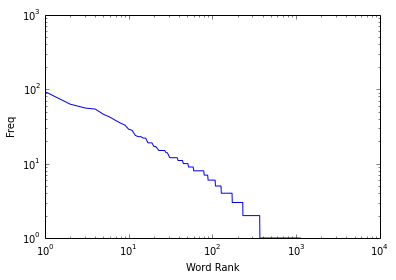

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
word_counts = sorted(Counter(words).values(), reverse=True)

plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

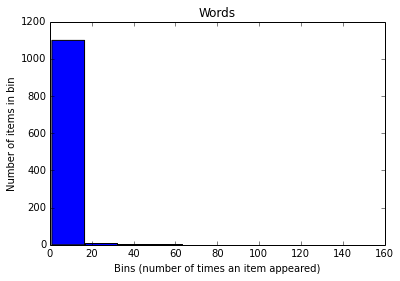

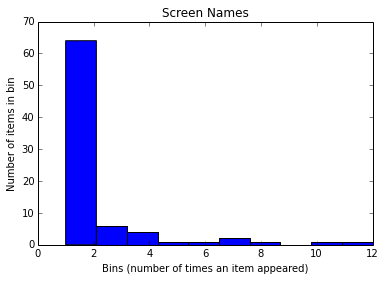

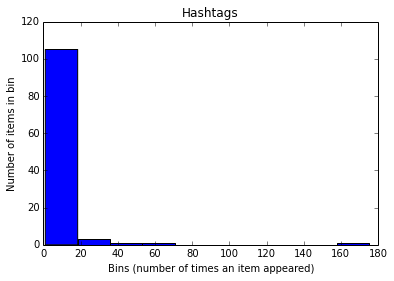

In [26]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    # Add a title and y-label ...
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    # ... and display as a new figure
    plt.figure()

[10, 7, 3, 3, 7, 3, 1, 14, 1, 7, 1, 1, 11, 31, 31, 19, 1, 2, 26, 11, 2, 2, 8, 2, 7, 4, 31, 31, 8, 19, 31, 11, 1, 8, 4, 1, 7, 4, 7, 8, 1, 7, 10, 1, 1, 1, 4, 11, 7, 8, 31, 8, 11, 8, 3, 20, 1, 7, 4, 2, 3, 11, 4, 2, 3, 11, 4, 1, 3, 19, 11, 24, 31, 11, 31, 2, 11, 3, 5, 4, 4, 8, 7, 31, 15, 11, 1, 1, 4, 15, 6]


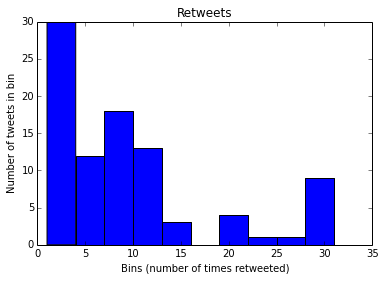

In [27]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

print counts

In [30]:
from math import log
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them

counts = [count for count, _, _ in retweets]

# Taking the log of the *data values* themselves can 
# often provide quick and valuable insight into the
# underlying distribution as well. Try it back on
# Example 13 and see if it helps.

plt.hist(log(counts))
plt.title("Retweets")
plt.xlabel('Log[Bins (number of times retweeted)]')
plt.ylabel('Log[Number of tweets in bin]')

print log(counts)

TypeError: a float is required